## Heatmap for Single Cell Data 

This file is to interpret the main PCs produced by the contrastive principle component analysis.

In [1]:
import numpy as np
import pandas as pd

In [2]:
V_Etop = pd.read_csv("V_Etop.csv")
V_H2O2 = pd.read_csv("V_H2O2.csv")
V_Starve = pd.read_csv("V_Starve.csv")

print("V_Etop shape: ", V_Etop.shape)
print("V_H2O2 shape: ", V_H2O2.shape)
print("V_Starve shape: ", V_Starve.shape)

V_Etop shape:  (47, 8)
V_H2O2 shape:  (47, 7)
V_Starve shape:  (47, 5)


In [3]:
features = {'AreaShape_Area_cell', 'Int_Med_cycD1_nuc','AreaShape_Area_nuc', 'Int_Med_cycE_nuc', 'Int_Intg_DNA_nuc','Int_Med_p16_nuc','Int_Med_BP1_nuc','Int_Med_p21_nuc','Int_Med_CDK11b_nuc','Int_Med_p27_nuc',
            'Int_Med_CDK2_nuc','Int_Med_p38_nuc','Int_Med_CDK4_nuc','Int_Med_p53_nuc','Int_Med_CDK6_nuc','Int_Med_pCHK1_nuc','Int_Med_Cdh1_nuc','Int_Med_pCdc6_nuc','Int_Med_Cdt1_nuc','Int_Med_pH2AX_nuc',
            'Int_Med_DNA_nuc','Int_Med_pRB_nuc','Int_Med_E2F1_nuc','Int_Med_pS6_nuc','Int_Med_Fra1_nuc','Int_Med_pp21_nuc','Int_Med_RB_nuc','Int_Med_pp27_nuc','Int_Med_S6_nuc','Int_Med_pp38_nuc',
            'Int_Med_Skp2_nuc','Int_Med_pp53_nuc','Int_Med_YAP_nuc','Int_Med_PCNA_nuc','Int_Med_cFos_nuc','Int_Std_PCNA_nuc','Int_Med_cJun_nuc','Int_pRB_over_RB_nuc','Int_Med_cMyc_nuc','Int_pS6_over_S6_nuc',
            'Int_Med_cdc6_nuc','Int_pp21_over_p21_nuc','Int_Med_cycA_nuc','Int_pp27_over_p27_nuc','Int_Med_cycB1_nuc','Int_pp53_over_p53_nuc','Int_pp38_over_p38_nuc'}

features = list(features)

# sort labels 
features = np.sort(features) 

print(type(features))
print(len(features))

<class 'numpy.ndarray'>
47


### Create Heatmap

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [5]:
combined_matrix = np.hstack((V_Etop, V_H2O2, V_Starve))
print(combined_matrix.shape)

(47, 20)


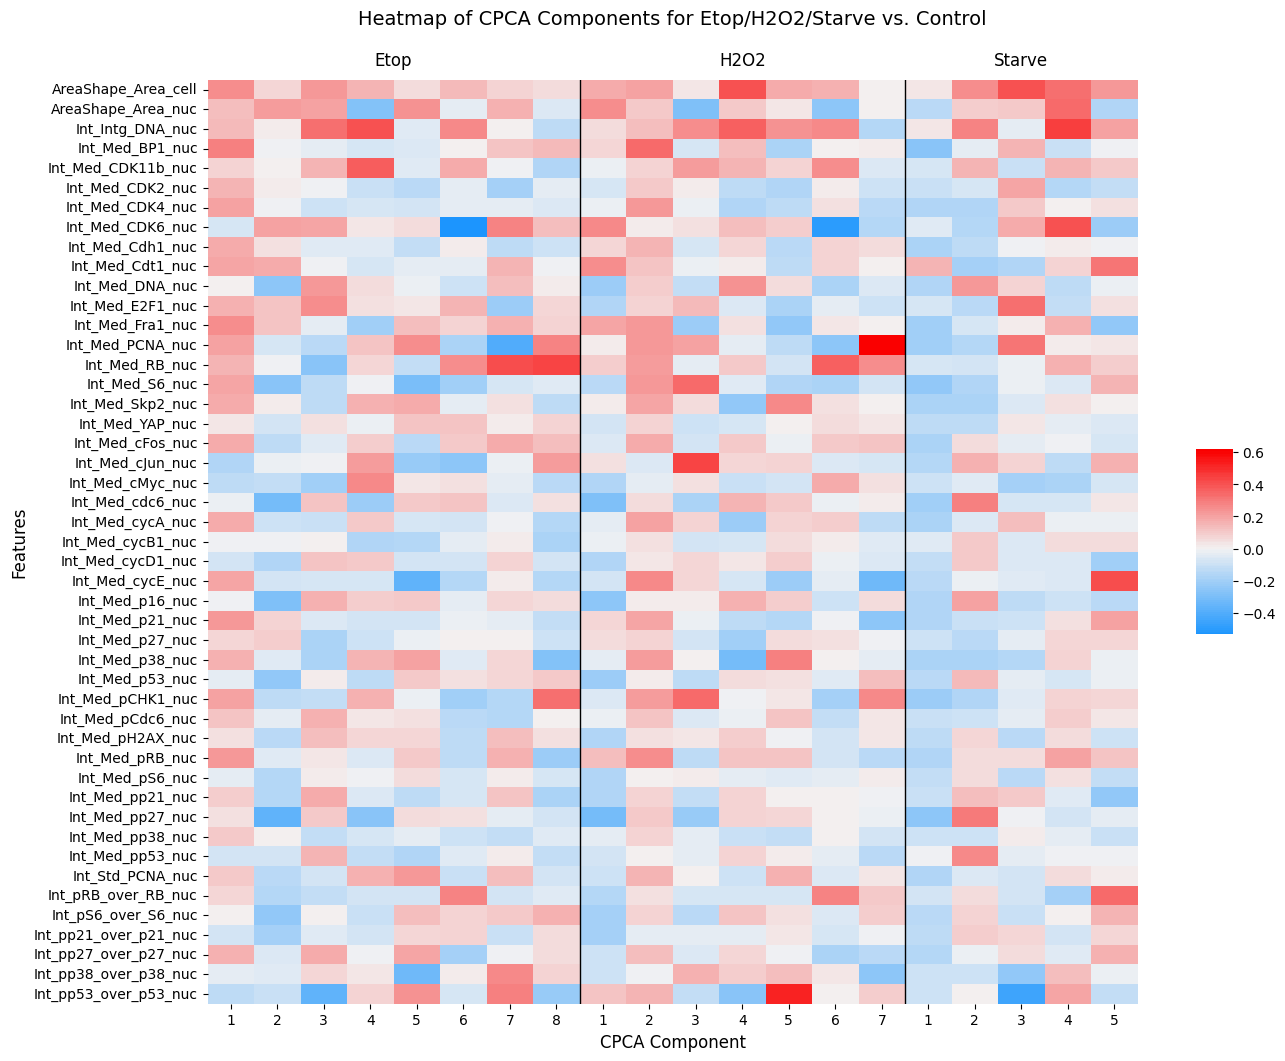

In [6]:
conditions = [str(i) for i in range(1, 9)] + [str(i) for i in range(1, 8)] + [str(i) for i in range(1, 6)]
conditions_labels = ['Etop', 'H2O2', 'Starve']


# Create a custom diverging color map
cmap = sns.diverging_palette(245, 18, s=350, l=40, n=100, center='light') #250, 15

# Create the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(combined_matrix, xticklabels=conditions, yticklabels=features, cmap=cmap, center=0, cbar_kws={"shrink": 0.2, "aspect": 5})

plt.axvline(x=8, color='black', linewidth=1)
plt.axvline(x=15, color='black', linewidth=1)

plt.text(4, -1, conditions_labels[0], ha='center', va='center', fontsize=12)
plt.text(11.5, -1, conditions_labels[1], ha='center', va='center', fontsize=12)
plt.text(17.5, -1, conditions_labels[2], ha='center', va='center', fontsize=12)


# plot
plt.title('Heatmap of CPCA Components for Etop/H2O2/Starve vs. Control', pad=40, fontsize=14)
plt.xlabel('CPCA Component', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()